# Landmarks

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset
from helpers import imshow

## Creation of a Dataset container

In [3]:
DATASET_PATH= './Data'
dp = Dataset(path=DATASET_PATH)[0]

## Landmarks visualization

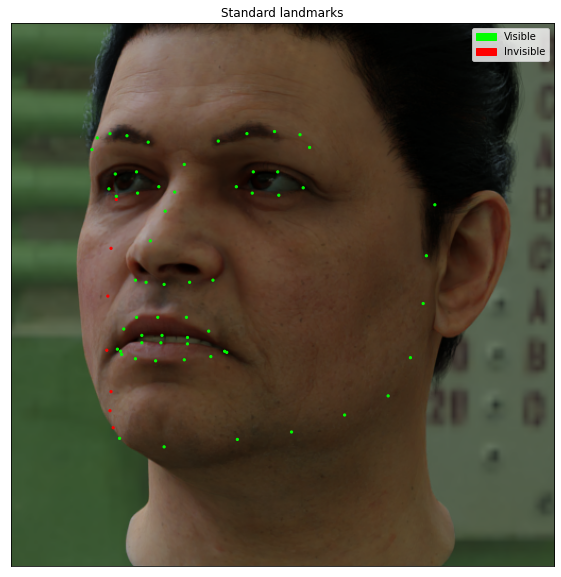

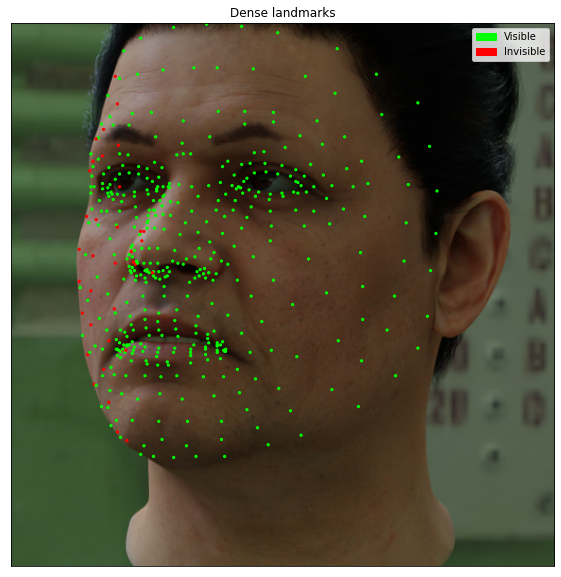

In [19]:
def show_landmarks(img, landmarks, visible, title, convention='ij'):
    # Convention can be either 'ij' (pixel coordinates) or 'xy' (cartesian coordinates)
    color = np.where(visible[:, np.newaxis], [[0, 1, 0]], [[1, 0, 0]])
    imshow(img)
    if convention == 'ij':
        plt.scatter(landmarks[:, 1], landmarks[:, 0], s=5, c=color)
    elif convention == 'xy':
        plt.scatter(landmarks[:, 0], landmarks[:, 1], s=5, c=color)


    pop_invisible = Patch(color=[1, 0, 0], label='Invisible')
    pop_visible = Patch(color=[0, 1, 0], label='Visible')

    plt.legend(handles=[pop_visible, pop_invisible])
    plt.title(title)

show_landmarks(img=dp.rgb_img, landmarks=dp.keypoints_2d_coordinates, visible=dp.is_visible, title='Standard landmarks')
show_landmarks(img=dp.rgb_img, landmarks=dp.dense_keypoints_2d_coordinates, visible=dp.dense_is_visible, title='Dense landmarks')

## 3D landmarks projection in camera frame

3D landmarks are in world coordinates

In [5]:
dp.keypoints_3d_coordinates[:5]

array([[-0.07168508,  0.07488196,  0.16107631],
       [-0.07388608,  0.07041365,  0.13987887],
       [-0.07529555,  0.06884521,  0.11945391],
       [-0.07548776,  0.06074718,  0.09626269],
       [-0.07242179,  0.04111835,  0.07942045]])

Let's use the camera matrices to convert them to image coordinates

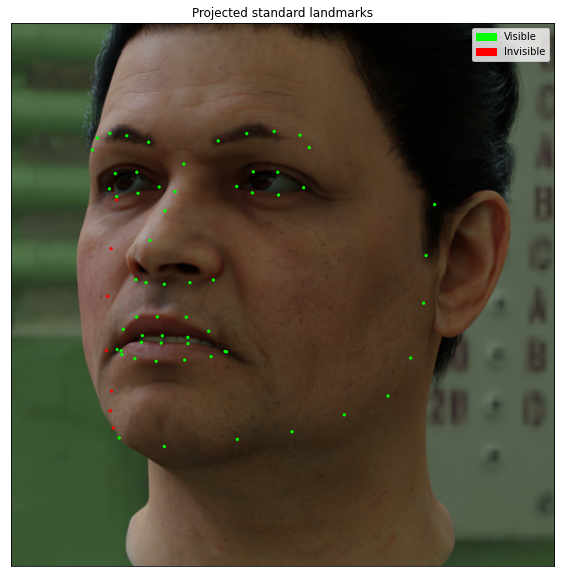

In [29]:
landmarks_homogeneous = np.hstack([dp.keypoints_3d_coordinates, np.ones((68, 1))])
extrinsic_matrix = dp.extrinsic_matrix.copy()
# FIXME: Used to fix the extrinsic matrix bug. Remove that once fixed
extrinsic_matrix[:, 3] *= -1
extrinsic_matrix_homogeneous = np.vstack([extrinsic_matrix, [0,0,0,1]])
landmarks_camera_homogeneous = landmarks_homogeneous @ extrinsic_matrix_homogeneous.T
intrinsic_matrix_homogeneous = np.hstack([dp.intrinsic_matrix, np.zeros((3, 1))])
landmarks_2d_homogeneous = landmarks_camera_homogeneous @ intrinsic_matrix_homogeneous.T
landmarks_2d = landmarks_2d_homogeneous[:, :2] / landmarks_2d_homogeneous[:, 2][:, np.newaxis]

show_landmarks(img=dp.rgb_img, landmarks=landmarks_2d, visible=dp.is_visible, title='Projected standard landmarks', convention='xy')